In [1]:
from pandas import read_csv, concat

usecols = range(1, 7)
role_defeat = read_csv('datasets/role_defeat.csv', usecols=usecols)
role_draw = read_csv('datasets/role_draw.csv', usecols=usecols)
role_victory = read_csv('datasets/role_victory.csv', usecols=usecols)
role = concat([role_defeat, role_draw, role_victory], ignore_index=True)
role.index = tuple((i, j) for i in range(role.shape[0] // 10) for j in range(10))
role

E   A   D    DMG      H    MIT
0   0   0   0   8   2947   1425   4611
    1   1   0   3   1818      0    650
    2   2   0   7   4735    487    308
    3   1   0   3   2078   2748      0
    4   1   1   3    269   5848    189
...    ..  ..  ..    ...    ...    ...
892 5  23   4  11  17510      0  18395
    6  22   0  11  14506    954   2181
    7   8   0  18   9756   1827    714
    8  11   7  12   8385  12803    300
    9  12  14  15   4090  12759     86

[8930 rows x 6 columns]

In [2]:
role.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 8930 entries, (np.int64(0), np.int64(0)) to (np.int64(892), np.int64(9))
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   E       8930 non-null   int64
 1   A       8930 non-null   int64
 2   D       8930 non-null   int64
 3   DMG     8930 non-null   int64
 4   H       8930 non-null   int64
 5   MIT     8930 non-null   int64
dtypes: int64(6)
memory usage: 484.4 KB


In [3]:
role.describe()

,E,A,D,DMG,H,MIT
count,8930.000000,8930.000000,8930.000000,8930.000000,8930.000000,8930.000000
mean,14.788466,7.295633,6.518365,6983.340538,3737.969653,2288.671109
std,9.282572,8.005035,3.639628,4465.821703,4881.747027,4424.920094
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,1.000000,4.000000,3492.500000,0.000000,0.000000
50%,14.000000,4.000000,6.000000,6332.500000,716.500000,385.000000
75%,21.000000,12.000000,9.000000,9772.500000,7105.000000,1931.000000
max,57.000000,62.000000,23.000000,29922.000000,26419.000000,34301.000000


In [4]:
import pandas as pd

role_0 = pd.DataFrame()
role_0['E0'] = role['E'] // 10
role_0['E1'] = role['E'] % 10
role_0['A0'] = role['A'] // 10
role_0['A1'] = role['A'] % 10
role_0['D0'] = role['D'] // 10
role_0['D1'] = role['D'] % 10
role_0['DMG0'] = role['DMG'] // 10000
role_0['DMG1'] = role['DMG'] // 1000 % 10
role_0['DMG2'] = role['DMG'] // 100 % 10
role_0['DMG3'] = role['DMG'] // 10 % 10
role_0['DMG4'] = role['DMG'] % 10
role_0['H0'] = role['H'] // 10000
role_0['H1'] = role['H'] // 1000 % 10
role_0['H2'] = role['H'] // 100 % 10
role_0['H3'] = role['H'] // 10 % 10
role_0['H4'] = role['H'] % 10
role_0['MIT0'] = role['MIT'] // 10000
role_0['MIT1'] = role['MIT'] // 1000 % 10
role_0['MIT2'] = role['MIT'] // 100 % 10
role_0['MIT3'] = role['MIT'] // 10 % 10
role_0['MIT4'] = role['MIT'] % 10
role_0

E0  E1  A0  A1  D0  D1  DMG0  DMG1  DMG2  DMG3  ...  H0  H1  H2  H3  \
0   0   0   0   0   0   0   8     0     2     9     4  ...   0   1   4   2   
    1   0   1   0   0   0   3     0     1     8     1  ...   0   0   0   0   
    2   0   2   0   0   0   7     0     4     7     3  ...   0   0   4   8   
    3   0   1   0   0   0   3     0     2     0     7  ...   0   2   7   4   
    4   0   1   0   1   0   3     0     0     2     6  ...   0   5   8   4   
...    ..  ..  ..  ..  ..  ..   ...   ...   ...   ...  ...  ..  ..  ..  ..   
892 5   2   3   0   4   1   1     1     7     5     1  ...   0   0   0   0   
    6   2   2   0   0   1   1     1     4     5     0  ...   0   0   9   5   
    7   0   8   0   0   1   8     0     9     7     5  ...   0   1   8   2   
    8   1   1   0   7   1   2     0     8     3     8  ...   1   2   8   0   
    9   1   2   1   4   1   5     0     4     0     9  ...   1   2   7   5   

       H4  MIT0  MIT1  MIT2  MIT3  MIT4  
0   0   5     0     4     6     1     1  
    1   0     0     0     6     5     0  
    2   7     0     0     3     0     8  
    3   8     0     0     0     0     0  
    4   8     0     0     1     8     9  
...    ..   ...   ...   ...   ...   ...  
892 5   0     1     8     3     9     5  
    6   4     0     2     1     8     1  
    7   7     0     0     7     1     4  
    8   3     0     0     3     0     0  
    9   9     0     0     0     8     6  

[8930 rows x 21 columns]

In [13]:
role_reshape = role_0.values.reshape(-1, 1)
role_reshape.shape

(187530, 1)

In [14]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)
encoder.fit(role_reshape)
encoder.categories_

[array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])]

In [15]:
role_transform = encoder.transform(role_reshape)
role_transform.shape

(187530, 10)

In [318]:
role_transform_reshape = role_transform.reshape(-1, 2100)
role_transform_reshape.shape

(893, 2100)

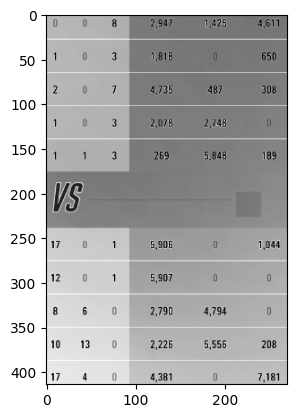

In [319]:
import tensorflow as tf
import matplotlib.pyplot as plt

raw = tf.io.read_file('datasets/role_defeat/defeat_001.png')
image = tf.image.decode_png(raw, 1)
offset_height, offset_width, target_height, target_width = 230, 920, 690, 450
image = tf.image.crop_to_bounding_box(image, offset_height, offset_width, target_height, target_width)
ratio = .6
target_height, target_width = int(target_height * ratio), int(target_width * ratio)
image = tf.image.resize(image, (target_height, target_width))
plt.imshow(image, 'Greys')

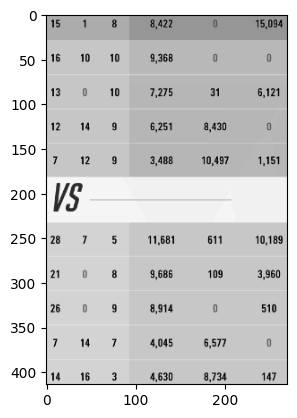

In [320]:
raw = tf.io.read_file('datasets/role_defeat/defeat_427.png')
image = tf.image.decode_png(raw, 1)
offset_height, offset_width, target_height, target_width = 230, 920, 690, 450
image = tf.image.crop_to_bounding_box(image, offset_height, offset_width, target_height, target_width)
ratio = .6
target_height, target_width = int(target_height * ratio), int(target_width * ratio)
image = tf.image.resize(image, (target_height, target_width))
plt.imshow(image, 'Greys')

In [321]:
target_height, target_width

(414, 270)

In [322]:
role_defeat_png = tf.constant([f'datasets/role_defeat/defeat_{i:03d}.png' for i in range(1, role_defeat.shape[0] // 10 + 1)])
role_draw_png = tf.constant([f'datasets/role_draw/draw_{i:03d}.png' for i in range(1, role_draw.shape[0] // 10 + 1)])
role_victory_png = tf.constant([f'datasets/role_victory/victory_{i:03d}.png' for i in range(1, role_victory.shape[0] // 10 + 1)])
role_png = tf.concat([role_defeat_png, role_draw_png, role_victory_png], 0)
role_png

<tf.Tensor: shape=(893,), dtype=string, numpy=
array([b'datasets/role_defeat/defeat_001.png',
       b'datasets/role_defeat/defeat_002.png',
       b'datasets/role_defeat/defeat_003.png',
       b'datasets/role_defeat/defeat_004.png',
       b'datasets/role_defeat/defeat_005.png',
       b'datasets/role_defeat/defeat_006.png',
       b'datasets/role_defeat/defeat_007.png',
       b'datasets/role_defeat/defeat_008.png',
       b'datasets/role_defeat/defeat_009.png',
       b'datasets/role_defeat/defeat_010.png',
       b'datasets/role_defeat/defeat_011.png',
       b'datasets/role_defeat/defeat_012.png',
       b'datasets/role_defeat/defeat_013.png',
       b'datasets/role_defeat/defeat_014.png',
       b'datasets/role_defeat/defeat_015.png',
       b'datasets/role_defeat/defeat_016.png',
       b'datasets/role_defeat/defeat_017.png',
       b'datasets/role_defeat/defeat_018.png',
       b'datasets/role_defeat/defeat_019.png',
       b'datasets/role_defeat/defeat_020.png',
       b'data

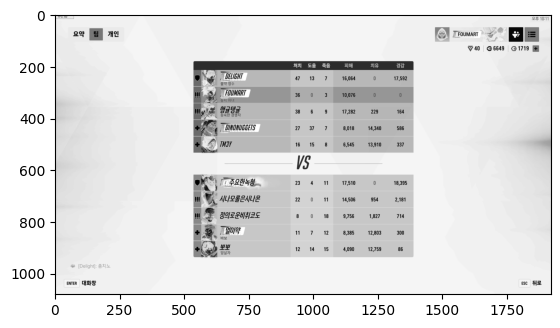

In [323]:
before_image = tf.io.read_file('datasets/role_victory/victory_456.png')
before_image = tf.image.decode_png(before_image, 1)
before_image = tf.expand_dims(before_image, axis=0)
plt.imshow(tf.cast(before_image[0], tf.int32), 'Grays')

In [324]:
tf.keras.backend.clear_session()
model = tf.keras.Sequential()
model.add(tf.keras.Input((1080, 1920, 1)))
model.add(tf.keras.layers.Cropping2D(((230, 160), (920, 550))))
model.add(tf.keras.layers.Resizing(345, 225))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation='relu'))
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(2100, activation='softmax'))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ cropping2d (Cropping2D)         │ (None, 690, 450, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resizing (Resizing)             │ (None, 345, 225, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 77625)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │    23,287,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2100)           │       212,100 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,530,000 (89.76 MB)

 Trainable params: 23,530,000 (89.76 MB)

 Non-trainable params: 0 (0.00 B)

In [329]:
model.compile('sgd', 'categorical_crossentropy', metrics=['accuracy'])

In [326]:
pngs = []
for path in role_png:
    raw = tf.io.read_file(path)
    image = tf.image.decode_png(raw, 1)
    pngs.append(image)
X_train_full = tf.convert_to_tensor(pngs)

In [327]:
X_valid, X_train = X_train_full[:10], X_train_full[10:]
y_valid, y_train = role_transform_reshape[:10], role_transform_reshape[10:]

In [330]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30


I0000 00:00:1756981542.775634    2567 service.cc:152] XLA service 0x7164780032d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1756981542.776680    2567 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 3070 Ti, Compute Capability 8.6
2025-09-04 10:25:42.916730: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1756981543.123040    2567 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-09-04 10:25:44.058372: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_186_0', 120 bytes spill stores, 120 bytes spill loads

2025-09-04 10:25:44.109317: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot

 8/28 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.0523 - loss: nan

I0000 00:00:1756981548.896905    2567 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


25/28 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.1064 - loss: nan

2025-09-04 10:25:50.147939: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_186_0', 120 bytes spill stores, 120 bytes spill loads

2025-09-04 10:25:50.166747: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_186', 200 bytes spill stores, 200 bytes spill loads

2025-09-04 10:25:50.398612: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_186', 540 bytes spill stores, 540 bytes spill loads

2025-09-04 10:25:50.414674: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_186', 64 bytes spill stores, 64 bytes spill loads

2025-09-04 10:25:50.740288: I extern

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step - accuracy: 0.1091 - loss: nan

2025-09-04 10:25:55.897089: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_184', 112 bytes spill stores, 112 bytes spill loads

2025-09-04 10:25:56.275782: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_184', 820 bytes spill stores, 864 bytes spill loads



28/28 ━━━━━━━━━━━━━━━━━━━━ 15s 312ms/step - accuracy: 0.1098 - loss: nan - val_accuracy: 0.3000 - val_loss: nan
Epoch 2/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.1468 - loss: nan - val_accuracy: 0.3000 - val_loss: nan
Epoch 3/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.1646 - loss: nan - val_accuracy: 0.3000 - val_loss: nan
Epoch 4/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.1680 - loss: nan - val_accuracy: 0.3000 - val_loss: nan
Epoch 5/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.1627 - loss: nan - val_accuracy: 0.3000 - val_loss: nan
Epoch 6/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.1414 - loss: nan - val_accuracy: 0.3000 - val_loss: nan
Epoch 7/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.1470 - loss: nan - val_accuracy: 0.3000 - val_loss: nan
Epoch 8/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.1473 - loss: nan - val_accuracy: 0.3000 - val_loss: nan
Epoch 9/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 